<a href="https://colab.research.google.com/github/VallenDraa/statistika-elementer/blob/main/statistik_deskriptif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" 
Program ini akan menampilkan hasil perhitungan ukuran pemusatan, 
penyebaran dan distribusi data yang merupakan bagian dari statistik deskriptif.

Adapun data yang akan digunakan adalah data pengangguran di Provinsi DKI 
Jakarta pada tahun 2016. terdapat 8 kolom pada data yaitu:
  
  1. Tahun
  2. Nama Provinsi 
  3. Nama Kabupaten / Kota
  4. Nama Kecamatan
  5. Nama Kelurahan
  6. Usia
  7. Jenis Kelamin
  8. Jumlah Orang Yang Menganggur

Disini kelompok tiga akan mengacu kepada jumlah pegangguran per kabupaten / kota
sebagai lingkup datanya agar visualisasi serta perhitungan data lebih mudah 
untuk dilakukan.
"""

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 0, 'Kabupaten / Kota')

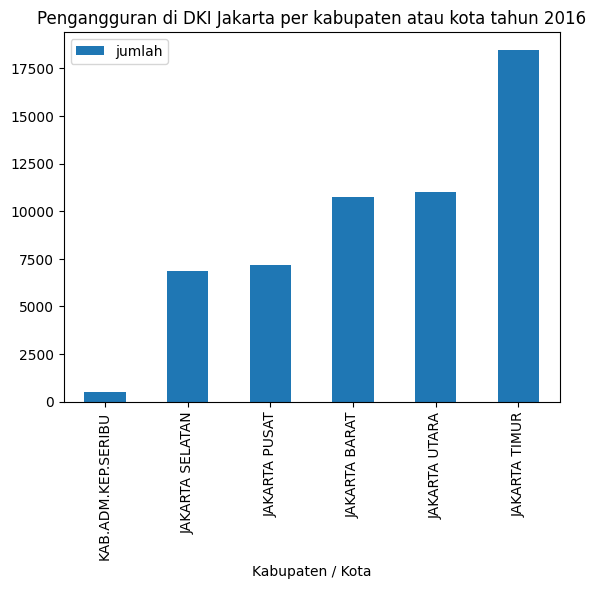

In [54]:
# membuat dataframe dari data pengangguran di DKI Jakarta per kabupaten tahun 2016 
df = pd.read_csv("/content/data-pengangguran-dki-2016.csv")
df_kabupaten = df.groupby("nama_kabupaten/kota").sum()[["jumlah"]].sort_values("jumlah")

# visualisasi dataframe sebagai histogram 
histogram = df_kabupaten.plot(kind="bar")
histogram.set_title("Pengangguran di DKI Jakarta per kabupaten atau kota tahun 2016")
histogram.set_xlabel("Kabupaten / Kota")


In [40]:
# Menghitung ukuran penyebaran data / dispersi

# Menghitung Kuartil
q_1 = df_kabupaten.quantile(.25).values[0]
q_2 = df_kabupaten.quantile(.5).values[0]
q_3 = df_kabupaten.quantile(.75).values[0]
q_4 = df_kabupaten.quantile(1).values[0]


print(f"kuartil 1: {q_1}\nkuartil 2: {q_2}\nkuartil 3: {q_3}\nkuartil 4: {q_4}")

kuartil 1: 6949.75
kuartil 2: 8966.5
kuartil 3: 10930.0
kuartil 4: 18487.0


In [41]:
# Menghitung Percentil (Mengambil contoh percentil ke 40, 70, dan 90)
p_40 = df_kabupaten.quantile(.4).values[0]
p_70 = df_kabupaten.quantile(.7).values[0]
p_90 = df_kabupaten.quantile(.9).values[0]

print(f"Percentil 40: {p_40}\nPercentil 70: {p_70}\nPercentil 90: {p_90}")

Percentil 40: 7186.0
Percentil 70: 10869.0
Percentil 90: 14739.0


In [46]:
# Menghitung range 
range = df_kabupaten["jumlah"].max() - df_kabupaten["jumlah"].min() 

print(f"Jarak antara nilai terbesar dan terkecil pada data adalah: {range}")

Jarak antara nilai terbesar dan terkecil pada data adalah: 17992


In [ ]:
# menghitung varian
